In [19]:
import numpy as np
import matplotlib.pyplot as plt
import ICC

In [20]:
# change for OS dependent paths
blue_path = "../ICC/Test_Data/Three_color_Celegans_FC_DCF_GC/blue_in_mask.tif.npy"
green_path = "../ICC/Test_Data/Three_color_Celegans_FC_DCF_GC/green_in_mask.tif.npy"
red_path = "../ICC/Test_Data/Three_color_Celegans_FC_DCF_GC/red_in_mask.tif.npy"

In [21]:
from ICC.IO_Methods import import_tif, import_npy
from ICC.image_manipulators import convert_img_int64, normalize_img
from ICC.cross_correlation import cross_correlation, auto_correlation, correlation_peak_detection
from ICC.simulators.image_simulators import sim_circle_img, sim_rectangle_img
from ICC.utils import radial_intensity

In [22]:
# load the images and convert them to int64
blue = import_npy(blue_path)
green = import_npy(green_path)
red = import_npy(red_path)


# normalize based on the lowest non-zero value and the highest value
blue = normalize_img(blue, lower=np.min(blue[blue > 0]), upper=np.max(blue), ignore_zeros=True)
green = normalize_img(green, lower=np.min(green[green > 0]), upper=np.max(green), ignore_zeros=True)
red = normalize_img(red, lower=np.min(red[red > 0]), upper=np.max(red), ignore_zeros=True)

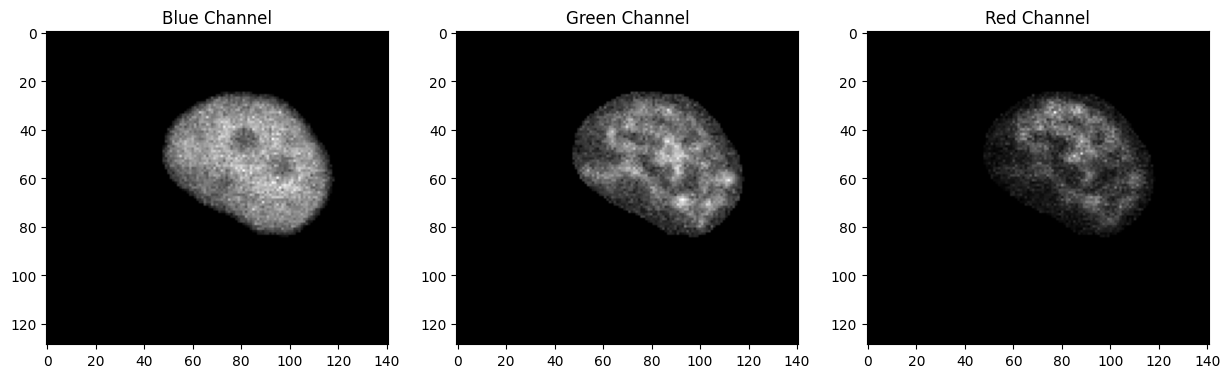

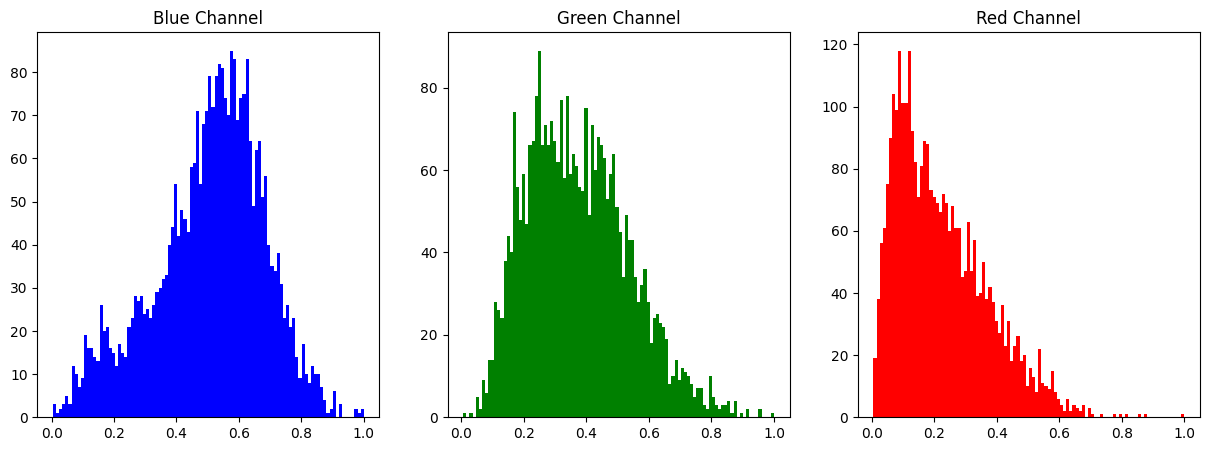

In [23]:
# plot the intensity profiles
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(blue, cmap='gray')
ax[0].set_title('Blue Channel')
ax[1].imshow(green, cmap='gray')
ax[1].set_title('Green Channel')
ax[2].imshow(red, cmap='gray')
ax[2].set_title('Red Channel')
plt.show()

# plot the histograms but ignore the zeros
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist(blue[blue != 0].flatten(), bins=100, color='blue')
ax[0].set_title('Blue Channel')
ax[1].hist(green[green != 0].flatten(), bins=100, color='green')
ax[1].set_title('Green Channel')
ax[2].hist(red[red != 0].flatten(), bins=100, color='red')
ax[2].set_title('Red Channel')
plt.show()




In [24]:
# test on simulated data

In [25]:
# make img1 with a circle at 50, 50 with radius 10
img1 = sim_circle_img((100, 100), 10, (50, 50))
# make img2 with a circle at 60, 60 with radius 5
img2 = sim_circle_img((100, 100), 10, (60, 60))
# this means that the two circles are separated by (10^2 + 10^2)^0.5 = 14.14 pixels

In [26]:
# auto correlation of img1, img2 and cross correlation of img1, img2
auto_correlation_img1 = cross_correlation(img1, img1)
auto_correlation_img2 = cross_correlation(img2, img2)
cross_correlation_img1_img2 = cross_correlation(img1, img2)

In [27]:
# find the peak of the cross correlation
peak_auto_img1 = correlation_peak_detection(auto_correlation_img1,closeness_threshold=1e-2)
peak_auto_img2 = correlation_peak_detection(auto_correlation_img2,closeness_threshold=1e-2)
peak_cross_img1_img2 = correlation_peak_detection(cross_correlation_img1_img2,closeness_threshold=1e-2)

In [28]:
# print the peak locations
print(f"Peak location of auto correlation of img1: {peak_auto_img1}")
print(f"Peak location of auto correlation of img2: {peak_auto_img2}")
print(f"Peak location of cross correlation of img1 and img2: {peak_cross_img1_img2}")

Peak location of auto correlation of img1: [[49 49]]
Peak location of auto correlation of img2: [[49 49]]
Peak location of cross correlation of img1 and img2: [[39 39]]


In [29]:
# find the radial intensity of the cross correlation from the center of the image
intensity_cross_img1_img2 = radial_intensity(cross_correlation_img1_img2, (50, 50))

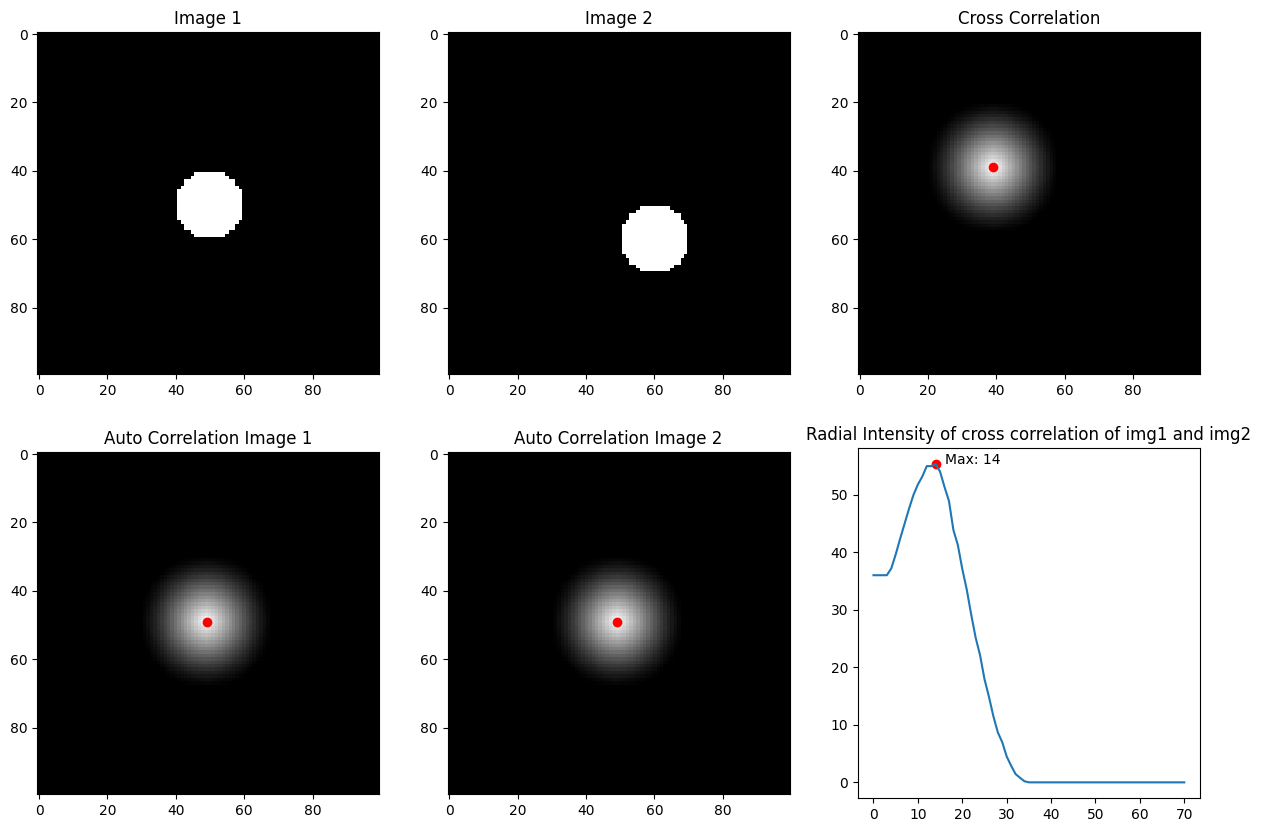

In [30]:
# plot the images, their auto correlation and cross correlation and plot the peaks
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].imshow(img1, cmap='gray')
axs[0, 0].set_title('Image 1')
axs[0, 1].imshow(img2, cmap='gray')
axs[0, 1].set_title('Image 2')
axs[0, 2].imshow(cross_correlation_img1_img2, cmap='gray')
axs[0, 2].scatter(peak_cross_img1_img2[:, 1], peak_cross_img1_img2[:, 0], color='red')
axs[0, 2].set_title('Cross Correlation')
axs[1, 0].imshow(auto_correlation_img1, cmap='gray')
axs[1, 0].scatter(peak_auto_img1[:, 1], peak_auto_img1[:, 0], color='red')
axs[1, 0].set_title('Auto Correlation Image 1')
axs[1, 1].imshow(auto_correlation_img2, cmap='gray')
axs[1, 1].scatter(peak_auto_img2[:, 1], peak_auto_img2[:, 0], color='red')
axs[1, 1].set_title('Auto Correlation Image 2')
# plot the radial intensity of the cross correlation
axs[1, 2].plot(intensity_cross_img1_img2)
axs[1, 2].set_title('Radial Intensity of cross correlation of img1 and img2')
# plot the location of the max in the radial intensity
axs[1, 2].scatter(np.argmax(intensity_cross_img1_img2), intensity_cross_img1_img2[np.argmax(intensity_cross_img1_img2)], color='red')
# text the max value location
axs[1, 2].text(np.argmax(intensity_cross_img1_img2) + 2, intensity_cross_img1_img2[np.argmax(intensity_cross_img1_img2)], f"Max: {np.argmax(intensity_cross_img1_img2)}")
plt.show()

In [31]:
# simulate a rectangle image and find the radial intensity of the cross correlation
img1 = sim_rectangle_img((100, 100), 10, 10, (50, 50))
img2 = sim_rectangle_img((100, 100), 10, 10, (60, 60))
auto_correlation_img1 = cross_correlation(img1, img1)
auto_correlation_img2 = cross_correlation(img2, img2)
cross_correlation_img1_img2 = cross_correlation(img1, img2)
peak_auto_img1 = correlation_peak_detection(auto_correlation_img1,closeness_threshold=1e-2)
peak_auto_img2 = correlation_peak_detection(auto_correlation_img2,closeness_threshold=1e-2)
peak_cross_img1_img2 = correlation_peak_detection(cross_correlation_img1_img2,closeness_threshold=1e-2)
intensity_cross_img1_img2 = radial_intensity(cross_correlation_img1_img2, (50, 50))

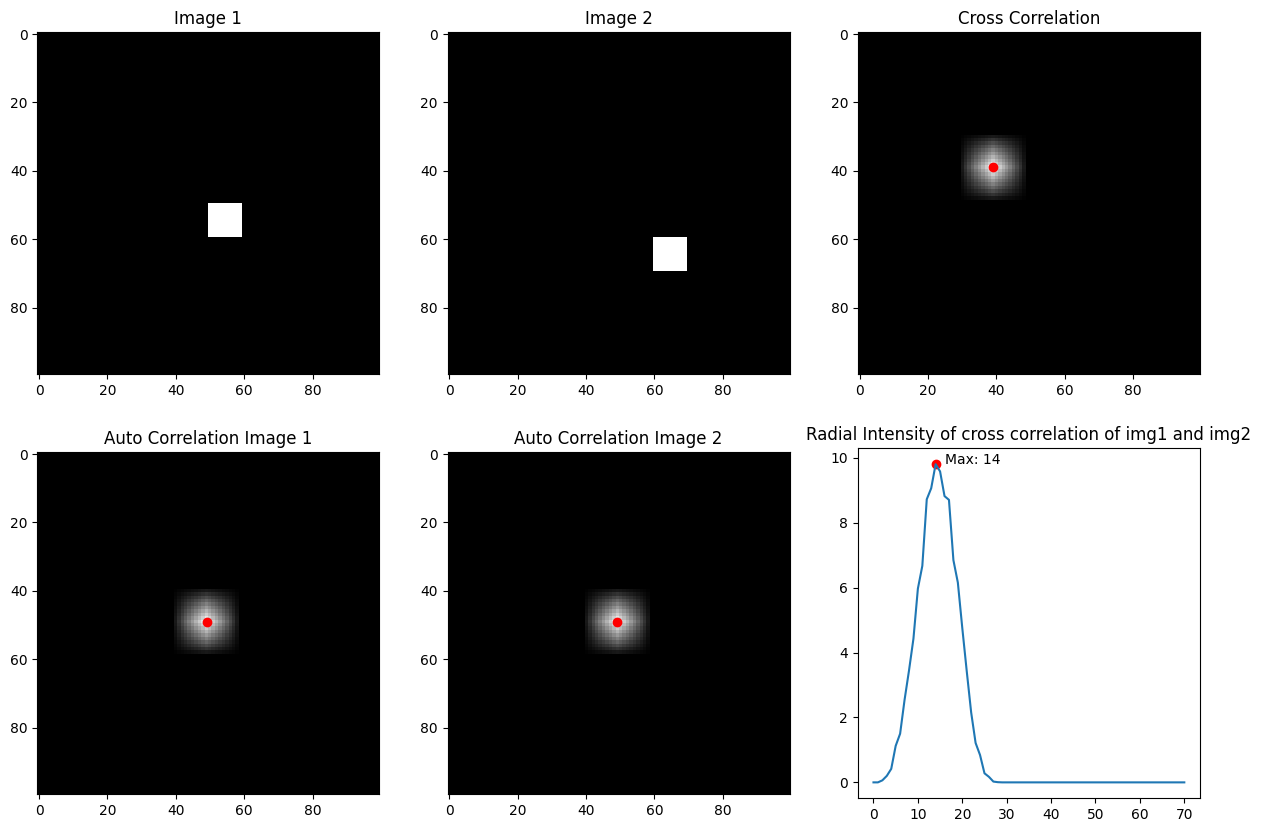

In [32]:
# plot the images, their auto correlation and cross correlation and plot the peaks
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].imshow(img1, cmap='gray')
axs[0, 0].set_title('Image 1')
axs[0, 1].imshow(img2, cmap='gray')
axs[0, 1].set_title('Image 2')
axs[0, 2].imshow(cross_correlation_img1_img2, cmap='gray')
axs[0, 2].scatter(peak_cross_img1_img2[:, 1], peak_cross_img1_img2[:, 0], color='red')
axs[0, 2].set_title('Cross Correlation')
axs[1, 0].imshow(auto_correlation_img1, cmap='gray')
axs[1, 0].scatter(peak_auto_img1[:, 1], peak_auto_img1[:, 0], color='red')
axs[1, 0].set_title('Auto Correlation Image 1')
axs[1, 1].imshow(auto_correlation_img2, cmap='gray')
axs[1, 1].scatter(peak_auto_img2[:, 1], peak_auto_img2[:, 0], color='red')
axs[1, 1].set_title('Auto Correlation Image 2')
# plot the radial intensity of the cross correlation
axs[1, 2].plot(intensity_cross_img1_img2)
axs[1, 2].set_title('Radial Intensity of cross correlation of img1 and img2')
# plot the location of the max in the radial intensity
axs[1, 2].scatter(np.argmax(intensity_cross_img1_img2), intensity_cross_img1_img2[np.argmax(intensity_cross_img1_img2)], color='red')
# text the max value location
axs[1, 2].text(np.argmax(intensity_cross_img1_img2) + 2, intensity_cross_img1_img2[np.argmax(intensity_cross_img1_img2)], f"Max: {np.argmax(intensity_cross_img1_img2)}")
plt.show()

In [33]:
# make img1 with a circle at 50, 50 with radius 10 and one at 50, 50 with radius 5
img1 = sim_circle_img((100, 100), 10, (50, 50))
img2 = sim_circle_img((100, 100), 5, (50, 50))
auto_correlation_img1 = cross_correlation(img1, img1)
auto_correlation_img2 = cross_correlation(img2, img2)
cross_correlation_img1_img2 = cross_correlation(img1, img2)
peak_auto_img1 = correlation_peak_detection(auto_correlation_img1,closeness_threshold=1e-2)
peak_auto_img2 = correlation_peak_detection(auto_correlation_img2,closeness_threshold=1e-2)
peak_cross_img1_img2 = correlation_peak_detection(cross_correlation_img1_img2,closeness_threshold=1e-2)
intensity_cross_img1_img2 = radial_intensity(cross_correlation_img1_img2, (50, 50))

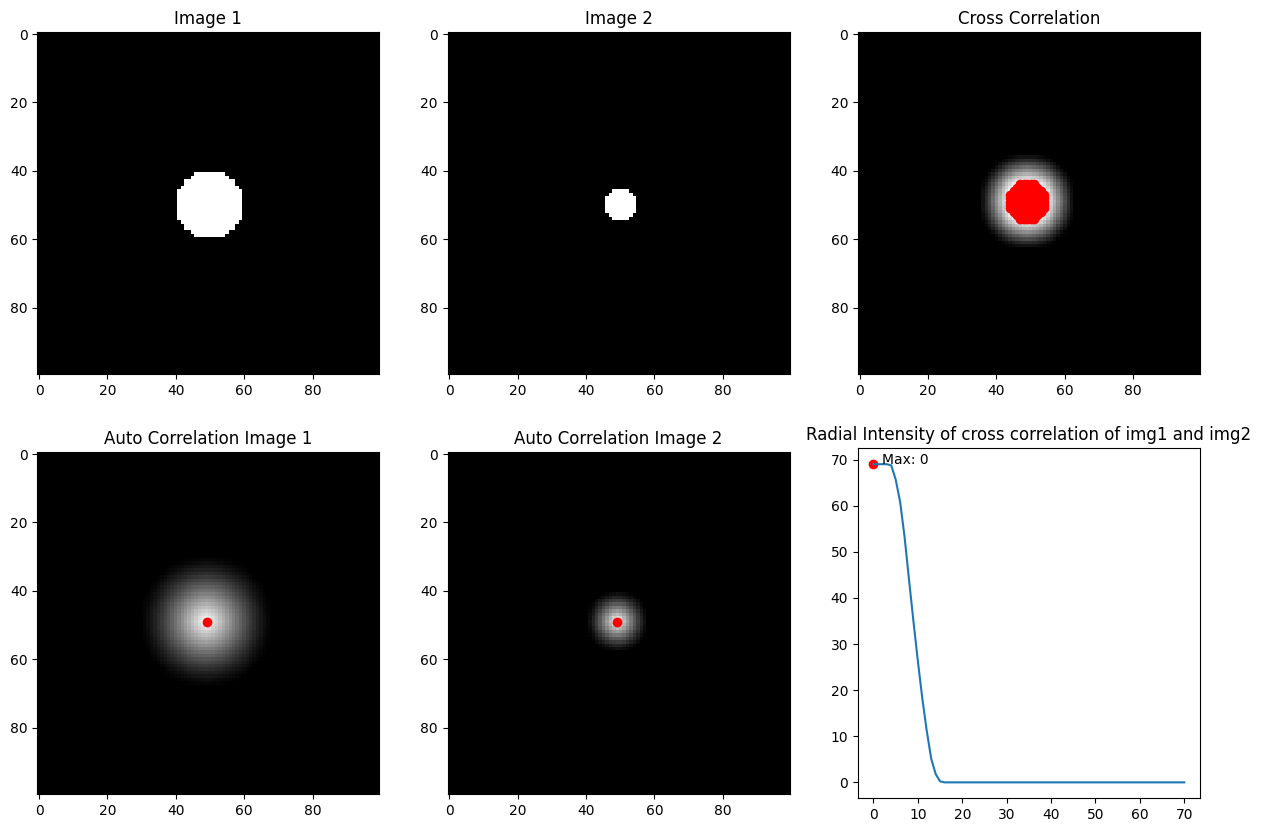

In [34]:
# plot the images, their auto correlation and cross correlation and plot the peaks
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].imshow(img1, cmap='gray')
axs[0, 0].set_title('Image 1')
axs[0, 1].imshow(img2, cmap='gray')
axs[0, 1].set_title('Image 2')
axs[0, 2].imshow(cross_correlation_img1_img2, cmap='gray')
axs[0, 2].scatter(peak_cross_img1_img2[:, 1], peak_cross_img1_img2[:, 0], color='red')
axs[0, 2].set_title('Cross Correlation')
axs[1, 0].imshow(auto_correlation_img1, cmap='gray')
axs[1, 0].scatter(peak_auto_img1[:, 1], peak_auto_img1[:, 0], color='red')
axs[1, 0].set_title('Auto Correlation Image 1')
axs[1, 1].imshow(auto_correlation_img2, cmap='gray')
axs[1, 1].scatter(peak_auto_img2[:, 1], peak_auto_img2[:, 0], color='red')
axs[1, 1].set_title('Auto Correlation Image 2')
# plot the radial intensity of the cross correlation
axs[1, 2].plot(intensity_cross_img1_img2)
axs[1, 2].set_title('Radial Intensity of cross correlation of img1 and img2')
# plot the location of the max in the radial intensity
axs[1, 2].scatter(np.argmax(intensity_cross_img1_img2), intensity_cross_img1_img2[np.argmax(intensity_cross_img1_img2)], color='red')
# text the max value location
axs[1, 2].text(np.argmax(intensity_cross_img1_img2) + 2, intensity_cross_img1_img2[np.argmax(intensity_cross_img1_img2)], f"Max: {np.argmax(intensity_cross_img1_img2)}")
plt.show()

In [35]:
# now test on the blue, green and red images

In [36]:
# correlation between blue and green
cross_correlation_blue_green = cross_correlation(blue, green)
peak_cross_blue_green = correlation_peak_detection(cross_correlation_blue_green,closeness_threshold=1e-2)
intensity_cross_blue_green = radial_intensity(cross_correlation_blue_green, (np.shape(blue)[0]//2, np.shape(blue)[1]//2))

# correlation between blue and red
cross_correlation_blue_red = cross_correlation(blue, red)
peak_cross_blue_red = correlation_peak_detection(cross_correlation_blue_red,closeness_threshold=1e-2)
intensity_cross_blue_red = radial_intensity(cross_correlation_blue_red, (np.shape(blue)[0]//2, np.shape(blue)[1]//2))

# correlation between green and red
cross_correlation_green_red = cross_correlation(green, red)
peak_cross_green_red = correlation_peak_detection(cross_correlation_green_red,closeness_threshold=1e-2)
intensity_cross_green_red = radial_intensity(cross_correlation_green_red, (np.shape(blue)[0]//2, np.shape(blue)[1]//2))

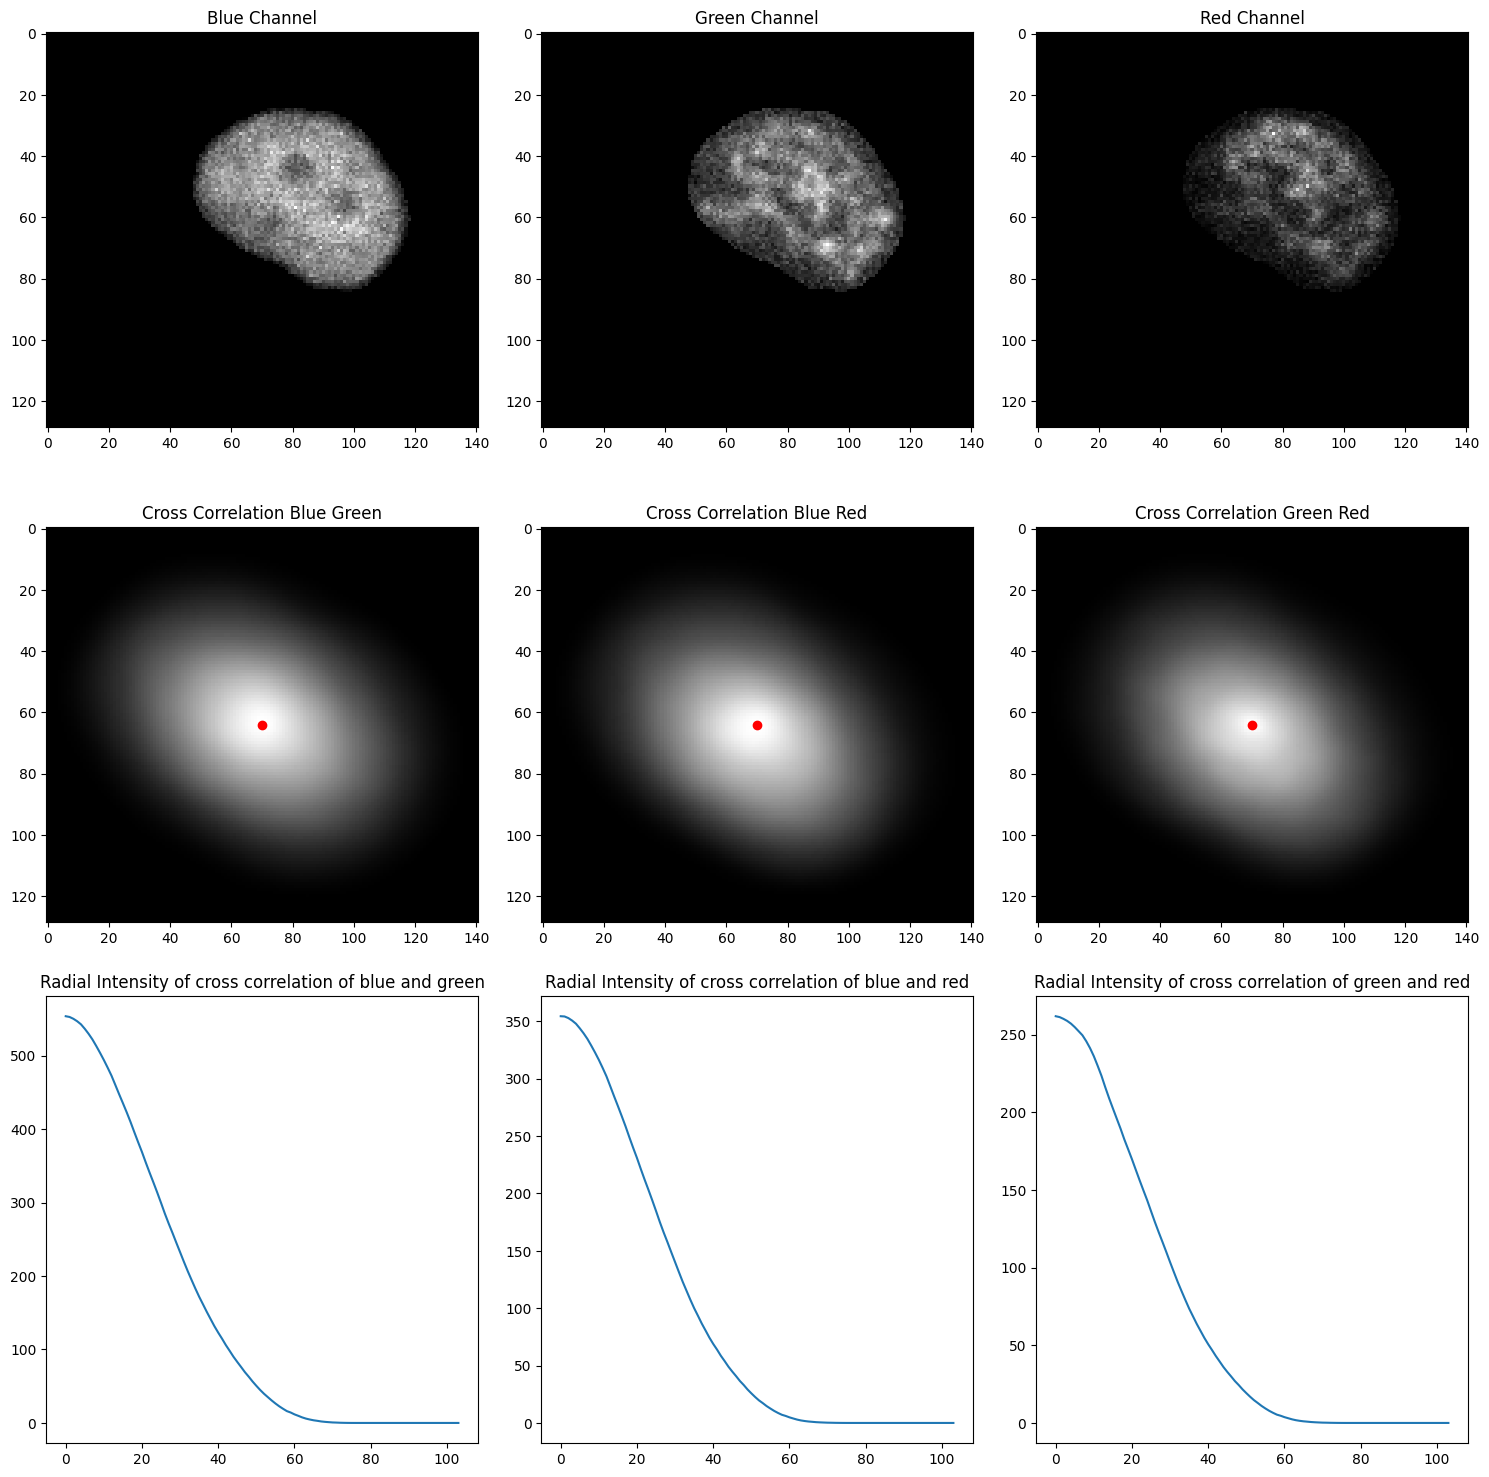

In [38]:
# plot the images, their auto correlation and cross correlation and plot the peaks
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs[0, 0].imshow(blue, cmap='gray')
axs[0, 0].set_title('Blue Channel')
axs[0, 1].imshow(green, cmap='gray')
axs[0, 1].set_title('Green Channel')
axs[0, 2].imshow(red, cmap='gray')
axs[0, 2].set_title('Red Channel')
axs[1, 0].imshow(cross_correlation_blue_green, cmap='gray')
axs[1, 0].scatter(peak_cross_blue_green[:, 1], peak_cross_blue_green[:, 0], color='red')
axs[1, 0].set_title('Cross Correlation Blue Green')
axs[1, 1].imshow(cross_correlation_blue_red, cmap='gray')
axs[1, 1].scatter(peak_cross_blue_red[:, 1], peak_cross_blue_red[:, 0], color='red')
axs[1, 1].set_title('Cross Correlation Blue Red')
axs[1, 2].imshow(cross_correlation_green_red, cmap='gray')
axs[1, 2].scatter(peak_cross_green_red[:, 1], peak_cross_green_red[:, 0], color='red')
axs[1, 2].set_title('Cross Correlation Green Red')
axs[2, 0].plot(intensity_cross_blue_green)
axs[2, 0].set_title('Radial Intensity of cross correlation of blue and green')
axs[2, 1].plot(intensity_cross_blue_red)
axs[2, 1].set_title('Radial Intensity of cross correlation of blue and red')
axs[2, 2].plot(intensity_cross_green_red)
axs[2, 2].set_title('Radial Intensity of cross correlation of green and red')

# tight layout
plt.tight_layout()
plt.show()
